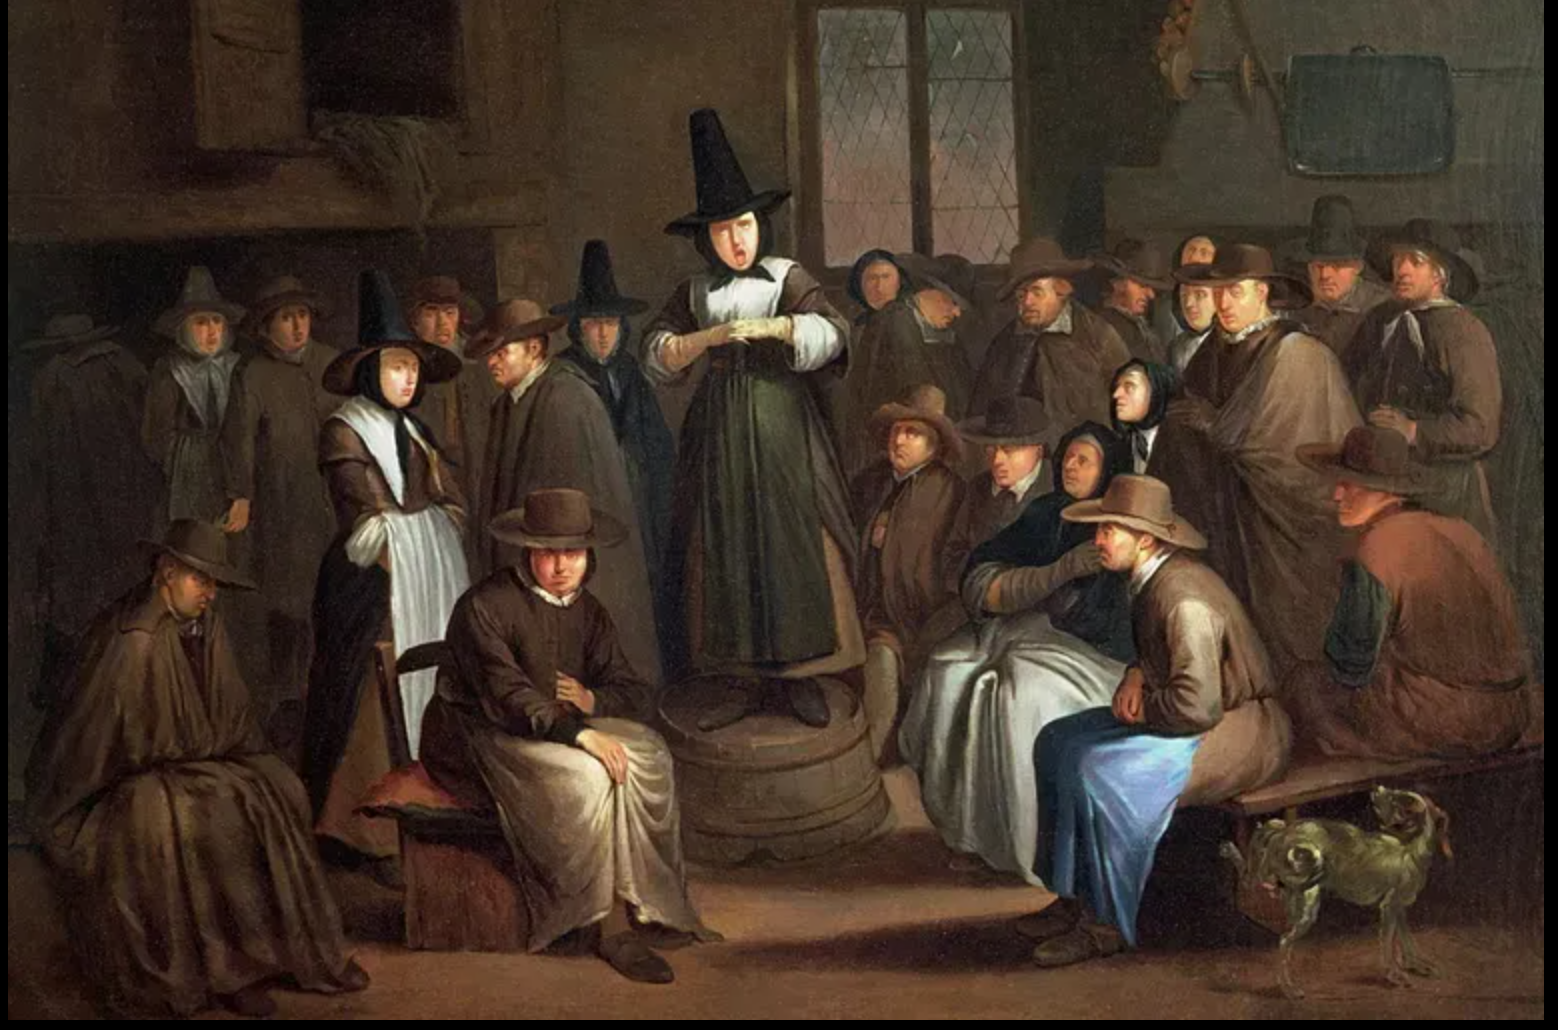

## Overview

Before Facebook friends existed, there was the Society of Friends, also known as the Quakers. Originating in England in the mid-seventeenth century, the Quakers were Protestant Christians who disagreed with the official Church of England. They advocated for religious tolerance, valuing individual conscience over enforced beliefs. The Quakers grew rapidly in the mid- to late-seventeenth century, spreading across the British Isles, Europe, and the New World colonies, especially Pennsylvania, founded by Quaker leader William Penn.

Scholars attribute the Quakers' growth to their effective networks. The data used in this analysis includes names and relationships among early seventeenth-century Quakers, derived from the Oxford Dictionary of National Biography and the Six Degrees of Francis Bacon project, reconstructing social networks in early modern Britain (1500-1700).

The data I chose to work with contains two data sets that I found in this website and found most intersting, https://sarahjpurcell.sites.grinnell.edu/digital_methods/tutorials/palladio/, you can find the data set here: https://sarahjpurcell.sites.grinnell.edu/digital_methods/files/.

Questions I would like to answer: 

What is the overall structure of the network?

Who are the important people, or hubs, in the network?

What are the subgroups and communities in the network?

I: I import the libraries and packages needed, the data and displayed a table of the data. 

II. I created networkx graphs and briefly comment on summary statistics.

III. I created visualization graphs using networkx, matplotlib, and seaborn.


## I. Data Imput

In [1]:
# Import the libraries and packages.

from networkx.algorithms import bipartite
import csv
import requests
from io import StringIO
import networkx as nx
from operator import itemgetter
import community
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Opening the two CSV files and read the data containined in those files.

In [2]:
# Add code that tells Python to open the nodelist and edgelist CSV files and read the data contained in those files. 

import csv
import requests
from io import StringIO

# URL of the CSV files
node_csv_url = 'https://raw.githubusercontent.com/enidroman/Data-620-Web-Analysis/main/quakers_nodelist.csv'
edge_csv_url = 'https://raw.githubusercontent.com/enidroman/Data-620-Web-Analysis/main/quakers_edgelist.csv'

# Download the CSV content for nodes
response_node = requests.get(node_csv_url)
content_node = response_node.text
nodecsv = StringIO(content_node)

# Read the CSV content for nodes using csv.reader
nodereader = csv.reader(nodecsv)
nodes = [n for n in nodereader][1:]
node_names = [n[0] for n in nodes]

# Download the CSV content for edges
response_edge = requests.get(edge_csv_url)
content_edge = response_edge.text
edgecsv = StringIO(content_edge)

# Read the CSV content for edges using csv.reader
edgereader = csv.reader(edgecsv)
edges = [tuple(e) for e in edgereader][1:]

# Now you can proceed with your data processing using the 'nodes' and 'edges' variables.


The with open statement is used to open CSV files in read mode ('r'). We create lists named nodecsv and edgecsv to store the data from these files. The indented lines following this process the CSV data, extract node names, retrieve edge data, and remove the header information.

In [3]:
# Check to make sure our data has loaded correctly into Python.

print(len(node_names)) # prints the count of node names
print(len(edges)) # prints the total count of edges


119
174


Python had correctly loaded 119 node names (number of rows in the nodelist file) and 174 edges (number of rows in the edgelist file).

Generated a table to visualize the two datasets.

In [4]:
from io import StringIO
import requests
import csv
from prettytable import PrettyTable

# URL of the CSV files
node_csv_url = 'https://raw.githubusercontent.com/enidroman/Data-620-Web-Analysis/main/quakers_nodelist.csv'
edge_csv_url = 'https://raw.githubusercontent.com/enidroman/Data-620-Web-Analysis/main/quakers_edgelist.csv'

# Download the CSV content for nodes
response_node = requests.get(node_csv_url)
content_node = response_node.text
nodecsv = StringIO(content_node)

# Read the CSV content for nodes using csv.reader
nodereader = csv.reader(nodecsv)
nodes = [n for n in nodereader][1:]
node_names = [n[0] for n in nodes]

# Download the CSV content for edges
response_edge = requests.get(edge_csv_url)
content_edge = response_edge.text
edgecsv = StringIO(content_edge)

# Read the CSV content for edges using csv.reader
edgereader = csv.reader(edgecsv)
edges = [tuple(e) for e in edgereader][1:]

# Display first 5 and last 5 rows of Nodes CSV in a table
nodes_table = PrettyTable(field_names=["Name", "Type", "Born", "Died", "Gender", "Occupation"])
nodes_table.add_rows(nodes[:5] + nodes[-5:])
print("Nodes CSV:")
print(nodes_table)

# Display first 5 and last 5 rows of Edges CSV in a table
edges_table = PrettyTable(field_names=["Source", "Target"])
edges_table.add_rows(edges[:5] + edges[-5:])
print("\nEdges CSV:")
print(edges_table)

Nodes CSV:
+----------------------------+-------------------------------+--------+------+--------+------------+
|            Name            |              Type             |  Born  | Died | Gender | Occupation |
+----------------------------+-------------------------------+--------+------+--------+------------+
|        Joseph Wyeth        |        religious writer       |  male  | 1663 |  1731  |  10013191  |
| Alexander Skene of Newtyle |  local politician and author  |  male  | 1621 |  1694  |  10011149  |
|        James Logan         | colonial official and scholar |  male  | 1674 |  1751  |  10007567  |
|       Dorcas Erbery        |        Quaker preacher        | female | 1656 |  1659  |  10003983  |
|        Lilias Skene        |    Quaker preacher and poet   |  male  | 1626 |  1697  |  10011152  |
|       Thomas Ellwood       |   religious controversialist  |  male  | 1639 |  1713  |  10003945  |
|      William Simpson       |        Quaker preacher        |  male  | 1627 |  

The Nodes CSV table presents information from the Nodes CSV dataset, detailing attributes of individuals within the Quaker network. Each row corresponds to a distinct individual and includes details such as their name, type (occupation or role), gender, birth and death years, and a unique identifier (Occupation). For instance, the first row describes Joseph Wyeth, a male Quaker born in 1663, who served as a religious writer and passed away in 1731. The table offers a concise overview of key attributes for each individual in the dataset, aiding in the analysis of the Quaker social network.

The table Edges CSV displays the relationships in the Edges CSV dataset, showing the connections between individuals. Each row represents a connection (edge) between a source and a target. For example, the first row indicates that George Keith is connected to Robert Barclay, and so on. The table helps visualize the network structure and the associations among the listed individuals.

Upon opening the edge file, you will see that the data uses the names from the node file to identify the nodes connected by each edge. These edges begin at a source node and end at a target node. While this language derives from so-called directed network structures, this data will be using our data as an undirected network: if Person A knows Person B, then Person B must also know Person A.

## II. Creating a NetworkX Graph and Calculations

### Creating a NetworkX Graph

We have a list of nodes (node_names) and a list of edges (edges) in Python. With NetworkX, we can bring these together for network analysis. It creates a Graph data object in NetworkX, making it easy to analyze relationships in our data.

In [5]:
# Print output information about our newly-created Graph object, including the number of nodes, edges, 
# and the average degree (average number of connections for each node). 

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)

# Output information about the Graph object
print("Number of nodes:", nx.number_of_nodes(G))
print("Number of edges:", nx.number_of_edges(G))
print("Average degree connectivity:", nx.average_degree_connectivity(G))


Number of nodes: 119
Number of edges: 174
Average degree connectivity: {1: 6.352941176470588, 4: 7.708333333333333, 2: 7.121212121212121, 3: 6.814814814814815, 6: 7.125, 22: 6.409090909090909, 5: 6.92, 16: 6.625, 13: 6.884615384615385, 10: 7.4, 8: 8.5625, 7: 8.928571428571429, 9: 7.888888888888889, 18: 5.444444444444445}


Here I get the number of nodes, edges, and the average degree connectivity for each nodes. 

### Adding Data Attributes in NetworkX

NetworkX, can assign attributes to nodes and edges in your Graph. I'll do this in two steps: first, create a Python dictionary for the attribute values, and then link these attributes in the dictionary to the respective nodes or edges.

In [6]:
# I’ll create empty dictionaries for each of the attribute fields in our nodelist CSV file.

hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

I instruct Python to loop through the data in the nodes list (from the nodelist CSV). For each entry, Python adds the relevant items to each dictionary. Python accomplishes this because our CSV data is organized with position or index information, allowing Python to accurately place items in dictionaries.

In [7]:
for node in nodes: # Loop through the list, one row at a time    
    hist_sig_dict[node[0]] = node[1]    
    gender_dict[node[0]] = node[2]    
    birth_dict[node[0]] = node[3]    
    death_dict[node[0]] = node[4]    
    id_dict[node[0]] = node[5]

I used a loop to go through each node in the nodes list, creating a set of Python dictionaries. Now, we can utilize these dictionaries to add attributes to our NetworkX Graph data object.

In NetworkX, the set_node_attributes function is used to link the Graph object and the dictionary containing attribute information. It also assigns a name to the newly added attribute information.

In [8]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance') 
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

G is the Graph, and hist_sig_dict, gender_dict, birth_dict, death_dict, and id_dict is our dictionary with attribute data. 'historical_significance' is the name assigned to the new attribute data in the Graph.

Now, with all nodes linked to attribute data, I can print specific combinations of nodes and their attributes.

In [9]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person    
    print(n, G.nodes[n]['birth_year']) # Access every node by name and "birth_year" attribute    


Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

### Calculating Metrics in NetworkX

The metrics in NetworkX offer more detailed insights and visualization into our network data.

#### Structural Calculations

#### Calculate the Density

This creates an object named "density" and uses NetworkX to calculate the density for our Graph. The print statement shows the calculated density.

In [10]:
density=nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


The density calculation provides an overview of the network's shape and basic properties. It reveals a predominant large component with interconnected nodes in the center, along with several small components at the edges. This pattern is commonly observed in network structures. The presence of multiple components guides the calculations to be performed. The visualization, showcasing node degree and size, highlights a few nodes with numerous connections, known as hubs. These hubs play a crucial role in holding the central component together, providing insights into centrality measurements in the subsequent section.
Our network's density, ranging from 0 to 1, indicates it's not very dense. A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network): this Quaker network is on the lower end of that scale, but still far from 0. Since Fox is also a hub (see degree centrality) with many connections, we might suppose that several shortest paths run through him as a mediator.


#### Calculate the Shortest path

The Shortest path calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations. This measure is essentially finding friends-of-friends—if my mother knows someone
that I don’t, then mom is the shortest path between me and that person. 
We can also see that Quaker Founder George Fox is on the shortest path between Fell and Whitehead. Since Fox is also a hub (see degree centrality) with many connections, we might suppose that several shortest paths run through him as a mediator.

This creates an object called "fell_whitehead_path" and uses NetworkX to find the shortest path (or number of connections) between Margaret Fell and George Whitehead.

In [11]:
fell_whitehead_path=nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")
print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


Why is calculating the shortest path valuable? This reveals that the shortest path from Fell to Whitehead involves passing through George Fox, a connection that might not have been obvious in a network visualization.

#### Calculate the Diameter

Executing the command diameter=nx.diameter(G) will result in an error because the diameter cannot be calculated for an unconnected Graph.

A connected Graph means all nodes are linked in some manner. Not all nodes are connected. Instead, you can pinpoint the most significant component or section of our network and calculate the diameter for that specific part. This measure is designed to give you a sense of the network’s overall size, the distance from one end of the network to another.

In [12]:
# Check if the graph is connected
if not nx.is_connected(G):
    # If not connected, consider using the largest connected component
    largest_component = max(nx.connected_components(G), key=len)
    G_connected = G.subgraph(largest_component).copy()
    diameter = nx.diameter(G_connected)
    print("Diameter of the largest connected component:", diameter)
else:
    diameter = nx.diameter(G)
    print("Diameter of the graph:", diameter)

Diameter of the largest connected component: 8


The diameter calculation we focused on the largest component, we can assume that there's no larger diameter among the other components. Therefore, the figure serves as a good representation of the entire graph's diameter. The network diameter of the largest component is 8, indicating that there is a path length of 8 between the two farthest-apart nodes in the network. Unlike density, which is scaled from 0 to 1, it's challenging to determine whether 8 is a large or small diameter solely from this number. For some global metrics, it's helpful to compare it to networks of similar size and shape.

#### Calculate the Triadic Closure 

Triadic closure suggests that if two individuals share a mutual acquaintance, they are likely to be acquainted with each other. 

In [13]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


Similar to density, transitivity ranges from 0 to 1. In this network, transitivity is approximately 0.1694, a bit higher than its density of 0.0248. Since the graph is not densely connected, there are fewer potential triangles, leading to slightly higher transitivity. Nodes with many connections are likely to be part of these enclosed triangles, and further exploration of these well-connected nodes is recommended.

### Centrality Measures

Centrality finds which nodes are the most important ones in your network. 

#### Calculate the Degree

This makes an object called degree_dict and employs NetworkX to compute the degree of centrality for the nodes in the Graph. The second line of code incorporates this centrality calculation as an attribute for each node.

In [14]:
degree_dict=dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
print(degree_dict)

{'Joseph Wyeth': 1, 'Alexander Skene of Newtyle': 1, 'James Logan': 4, 'Dorcas Erbery': 1, 'Lilias Skene': 1, 'William Mucklow': 1, 'Thomas Salthouse': 2, 'William Dewsbury': 3, 'John Audland': 6, 'Richard Claridge': 2, 'William Bradford': 3, 'Fettiplace Bellers': 1, 'John Bellers': 1, 'Isabel Yeamans': 1, 'George Fox the younger': 1, 'George Fox': 22, 'John Stubbs': 5, 'Anne Camm': 2, 'John Camm': 4, 'Thomas Camm': 3, 'Katharine Evans': 1, 'Lydia Lancaster': 1, 'Samuel Clarridge': 2, 'Thomas Lower': 1, 'Gervase Benson': 2, 'Stephen Crisp': 3, 'James Claypoole': 2, 'Thomas Holme': 2, 'John Freame': 1, 'John Swinton': 1, 'William Mead': 2, 'Henry Pickworth': 1, 'John Crook': 4, 'Gilbert Latey': 2, 'Ellis Hookes': 1, 'Joseph Besse': 2, 'James Nayler': 16, 'Elizabeth Hooten': 1, 'George Whitehead': 13, 'John Whitehead': 1, 'William Crouch': 2, 'Benjamin Furly': 10, 'Silvanus Bevan': 1, 'Robert Rich': 2, 'John Whiting': 1, 'Christopher Taylor': 2, 'Thomas Lawson': 2, 'Richard Farnworth': 6

An effective approach with degree calculation is to compare the relative centrality of various nodes. This can be achieved using the sort and itemgetter functions. 

In [15]:
sorted_degree=sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print(sorted_degree)

[('George Fox', 22), ('William Penn', 18), ('James Nayler', 16), ('George Whitehead', 13), ('Margaret Fell', 13), ('Benjamin Furly', 10), ('Edward Burrough', 9), ('George Keith', 8), ('Thomas Ellwood', 8), ('Francis Howgill', 7), ('John Perrot', 7), ('John Audland', 6), ('Richard Farnworth', 6), ('Alexander Parker', 6), ('John Story', 6), ('John Stubbs', 5), ('Thomas Curtis', 5), ('John Wilkinson', 5), ('William Caton', 5), ('Anthony Pearson', 5), ('James Logan', 4), ('John Camm', 4), ('John Crook', 4), ('John Burnyeat', 4), ('Rebecca Travers', 4), ('Mary Penington', 4), ('William Dewsbury', 3), ('William Bradford', 3), ('Thomas Camm', 3), ('Stephen Crisp', 3), ('Robert Barclay', 3), ('Tace Sowle', 3), ('Anthony Sharp', 3), ('Charles Marshall', 3), ('Martha Simmonds', 3), ('Thomas Salthouse', 2), ('Richard Claridge', 2), ('Anne Camm', 2), ('Samuel Clarridge', 2), ('Gervase Benson', 2), ('James Claypoole', 2), ('Thomas Holme', 2), ('William Mead', 2), ('Gilbert Latey', 2), ('Joseph Bess

In [16]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
 print(d)


Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


Here you can see the top twenty nodes ranked by degree.

#### Calculate Betweenness Centrality

Betweenness centrality determines how many shortest path routes pass through a particular node. While these 'broker' nodes might not be central in the standard network calculation, they play a crucial role in the network's structure.

In [17]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
 
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In these results, nodes with high Betweenness Centrality are different from the list generated by standard Centrality Degree calculations. Women such as Mary Penington and Elizabeth Leavens gain importance as broker nodes, a role not apparent in the standard centrality calculations. They have high betweenness centrality but low degree. 

In [18]:
print("Top 20 Betweeness nodes by degree:")
for b in sorted_degree[:20]:
 print(b)

Top 20 Betweeness nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


Here you can see the top 20 Betweeness nodes.

#### Calculate Eigenvector Centrality

Eigenvector Centrality is an expansion of degree centrality, considering both a node's edges and the edges of its neighbors. It not only values if you're a hub (important nodes) but also takes into account how many hubs you're connected to. The calculation results in a value between 0 and 1, where higher values indicate greater centrality. Eigenvector centrality helps identify nodes that can efficiently share information with many others in the network.

In [19]:
eigenvector_dict = nx.eigenvector_centrality(G)  # Run eigenvector centrality
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')  # Corrected line

print("Top 20 nodes by eigenvector centrality:")
sorted_eigenvector = sorted(eigenvector_dict.items(), key=lambda x: x[1], reverse=True)
for e in sorted_eigenvector[:20]:
    print(e)

Top 20 nodes by eigenvector centrality:
('George Fox', 0.4491750710859924)
('James Nayler', 0.3352974100447867)
('William Penn', 0.27032201153998675)
('Margaret Fell', 0.253170949905681)
('George Whitehead', 0.2497455334914196)
('Edward Burrough', 0.23147427604862303)
('Francis Howgill', 0.19095393782681047)
('Benjamin Furly', 0.1878520634691651)
('John Perrot', 0.18496928077956107)
('George Keith', 0.1838469086791535)
('Thomas Ellwood', 0.17608142535843857)
('Richard Farnworth', 0.15368535029296415)
('John Crook', 0.1327158126880779)
('Rebecca Travers', 0.1184804064465093)
('Alexander Parker', 0.11587808682088323)
('Anthony Pearson', 0.11120476725256785)
('William Dewsbury', 0.11057869321157118)
('John Stubbs', 0.10693500692141822)
('John Audland', 0.09830889719333748)
('Thomas Salthouse', 0.0954862854413877)


In [20]:
print("Top 20 Eigenvector nodes bydegree:")
for e in sorted_degree[:20]:
 print(e)

Top 20 Eigenvector nodes bydegree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


You see that while many nodes with high degree also have high betweenness centrality, it's not universally true. Specifically, betweenness centrality highlights two women, Elizabeth Leavens and Mary Penington, whose importance was not evident in the degree centrality metric. A benefit of performing these calculations in Python is the ability to easily compare two sets of calculations.

## Visualization

#### Centrality Measures Degree Graph

{'Joseph Wyeth': 1, 'Alexander Skene of Newtyle': 1, 'James Logan': 4, 'Dorcas Erbery': 1, 'Lilias Skene': 1, 'William Mucklow': 1, 'Thomas Salthouse': 2, 'William Dewsbury': 3, 'John Audland': 6, 'Richard Claridge': 2, 'William Bradford': 3, 'Fettiplace Bellers': 1, 'John Bellers': 1, 'Isabel Yeamans': 1, 'George Fox the younger': 1, 'George Fox': 22, 'John Stubbs': 5, 'Anne Camm': 2, 'John Camm': 4, 'Thomas Camm': 3, 'Katharine Evans': 1, 'Lydia Lancaster': 1, 'Samuel Clarridge': 2, 'Thomas Lower': 1, 'Gervase Benson': 2, 'Stephen Crisp': 3, 'James Claypoole': 2, 'Thomas Holme': 2, 'John Freame': 1, 'John Swinton': 1, 'William Mead': 2, 'Henry Pickworth': 1, 'John Crook': 4, 'Gilbert Latey': 2, 'Ellis Hookes': 1, 'Joseph Besse': 2, 'James Nayler': 16, 'Elizabeth Hooten': 1, 'George Whitehead': 13, 'John Whitehead': 1, 'William Crouch': 2, 'Benjamin Furly': 10, 'Silvanus Bevan': 1, 'Robert Rich': 2, 'John Whiting': 1, 'Christopher Taylor': 2, 'Thomas Lawson': 2, 'Richard Farnworth': 6

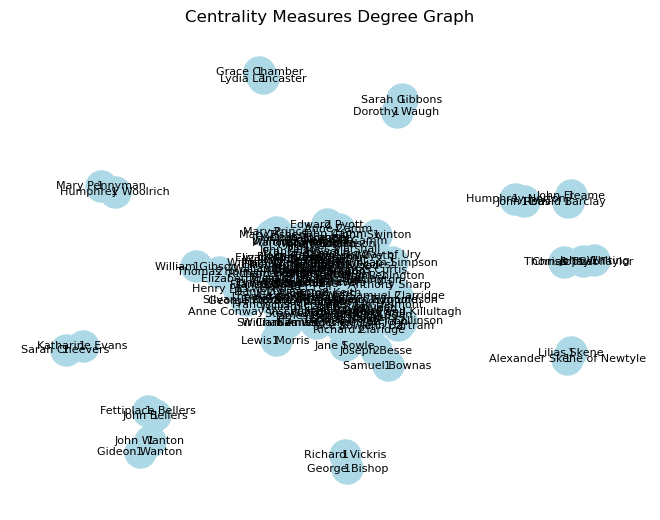

In [21]:
# Calculate degree for each node
degree_dict = dict(G.degree(G.nodes()))

# Set node attributes for 'degree'
nx.set_node_attributes(G, degree_dict, 'degree')

# Print the degree dictionary
print(degree_dict)

# Draw the graph
pos = nx.spring_layout(G)  # You can choose a layout based on your preferences
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8)

# Display the degree information on the nodes
labels = nx.get_node_attributes(G, 'degree')
nx.draw_networkx_labels(G, pos, labels, font_size=8)

# Add a title to the graph
plt.title("Centrality Measures Degree Graph")

plt.show()


The code creates a graph visualization where each node is shown with its degree value (number of connections). Here's a breakdown:

Calculate Degree: The code finds out how many connections each node has in the graph.

Set Node Attributes: It assigns the calculated degree values to each node.

Print Degree Info: Prints a dictionary showing the degrees of all nodes.

Draw the Graph: Visualizes the graph with nodes labeled and sized uniformly.

Display Degree Info: Shows each node's degree as a label on the graph.

Show the Graph:Displays the graph.

This graph helps you see how connected each node is in the network, making it easier to identify nodes with more or fewer connections. 

A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network): this Quaker network is on the lower end of that scale, but still far from 0.

Degree is the simplest and the most common way of finding important nodes. As shown, William Penn has a degree of 18, relatively high in this network. However, relying solely on degree as a centrality measure has limitations. It's evident that William Penn, being a prominent Quaker leader and founder of Pennsylvania, holds significance without the need for network analysis. Most social networks typically have a few highly connected hubs, but degree doesn't provide much insight into the remaining nodes. In many cases, the highlighted hubs, such as Penn or Quakerism co-founder Margaret Fell, are not surprising, often being founders or influential figures in the network.

#### Centrality Measures Degree Bar Graph

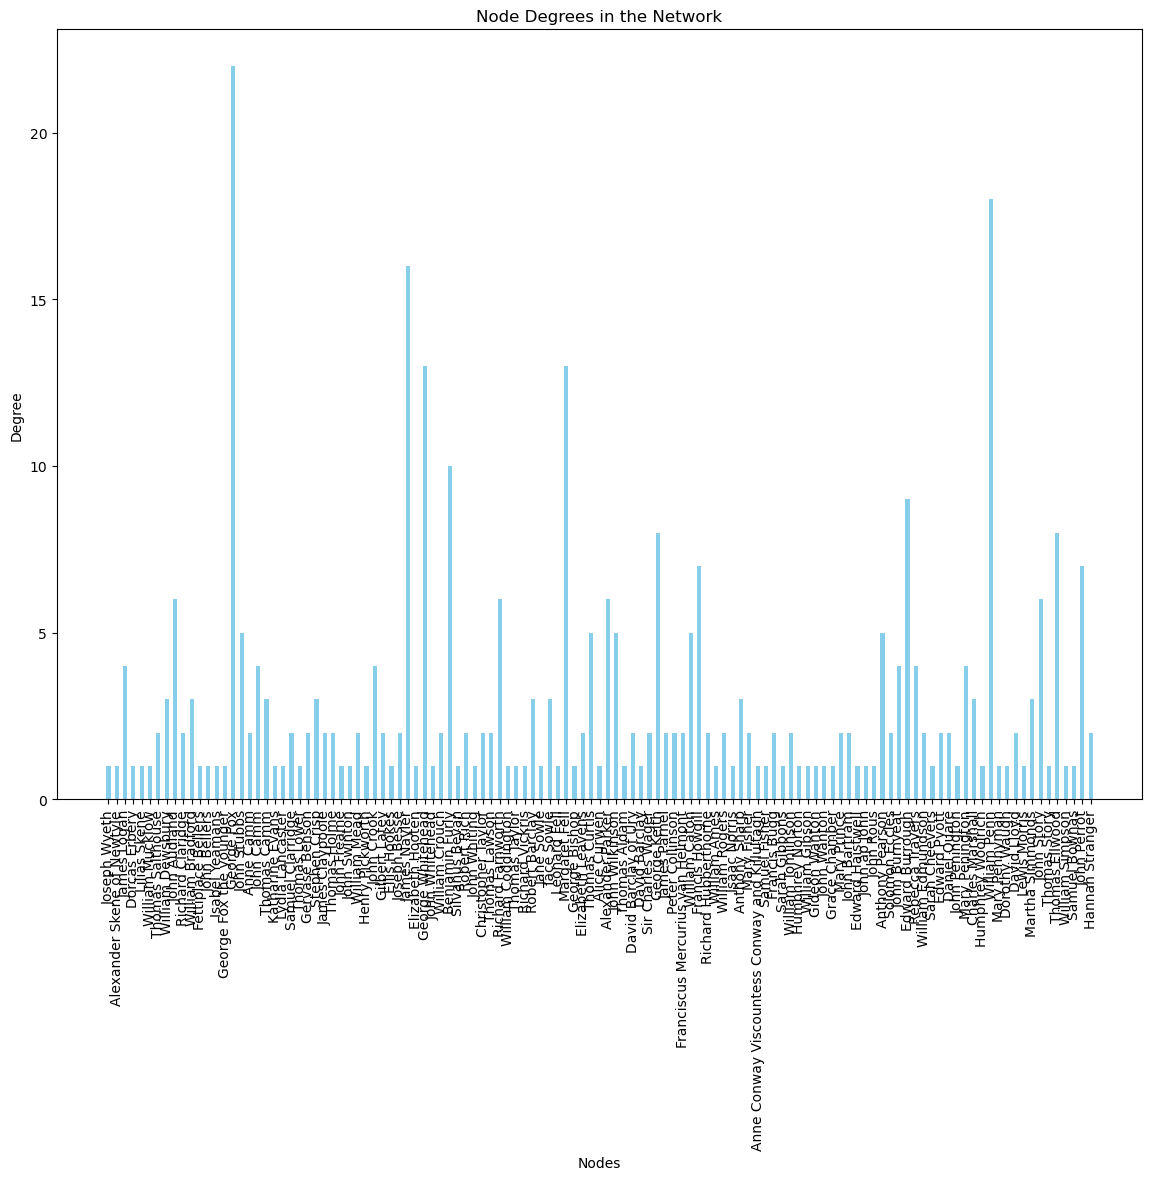

In [22]:
# Calculate degree for each node
degree_dict = dict(G.degree(G.nodes()))

# Set node attributes for 'degree'
nx.set_node_attributes(G, degree_dict, 'degree')

# Create a bar graph with x-axis labels at an angle and separated bars
plt.figure(figsize=(14, 10))
nodes = list(degree_dict.keys())
degrees = list(degree_dict.values())
bar_width = 0.5  # Adjust the width of the bars
bar_gap = 0.3   # Adjust the gap between bars

plt.bar(nodes, degrees, color='skyblue', width=bar_width, align='center')

# Set x-axis labels at a 90-degree angle and increase space
plt.xticks(rotation=90, ha='center')
plt.subplots_adjust(hspace=0.5)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Node Degrees in the Network')

plt.show()


#### Betweenness Centrality Graph

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


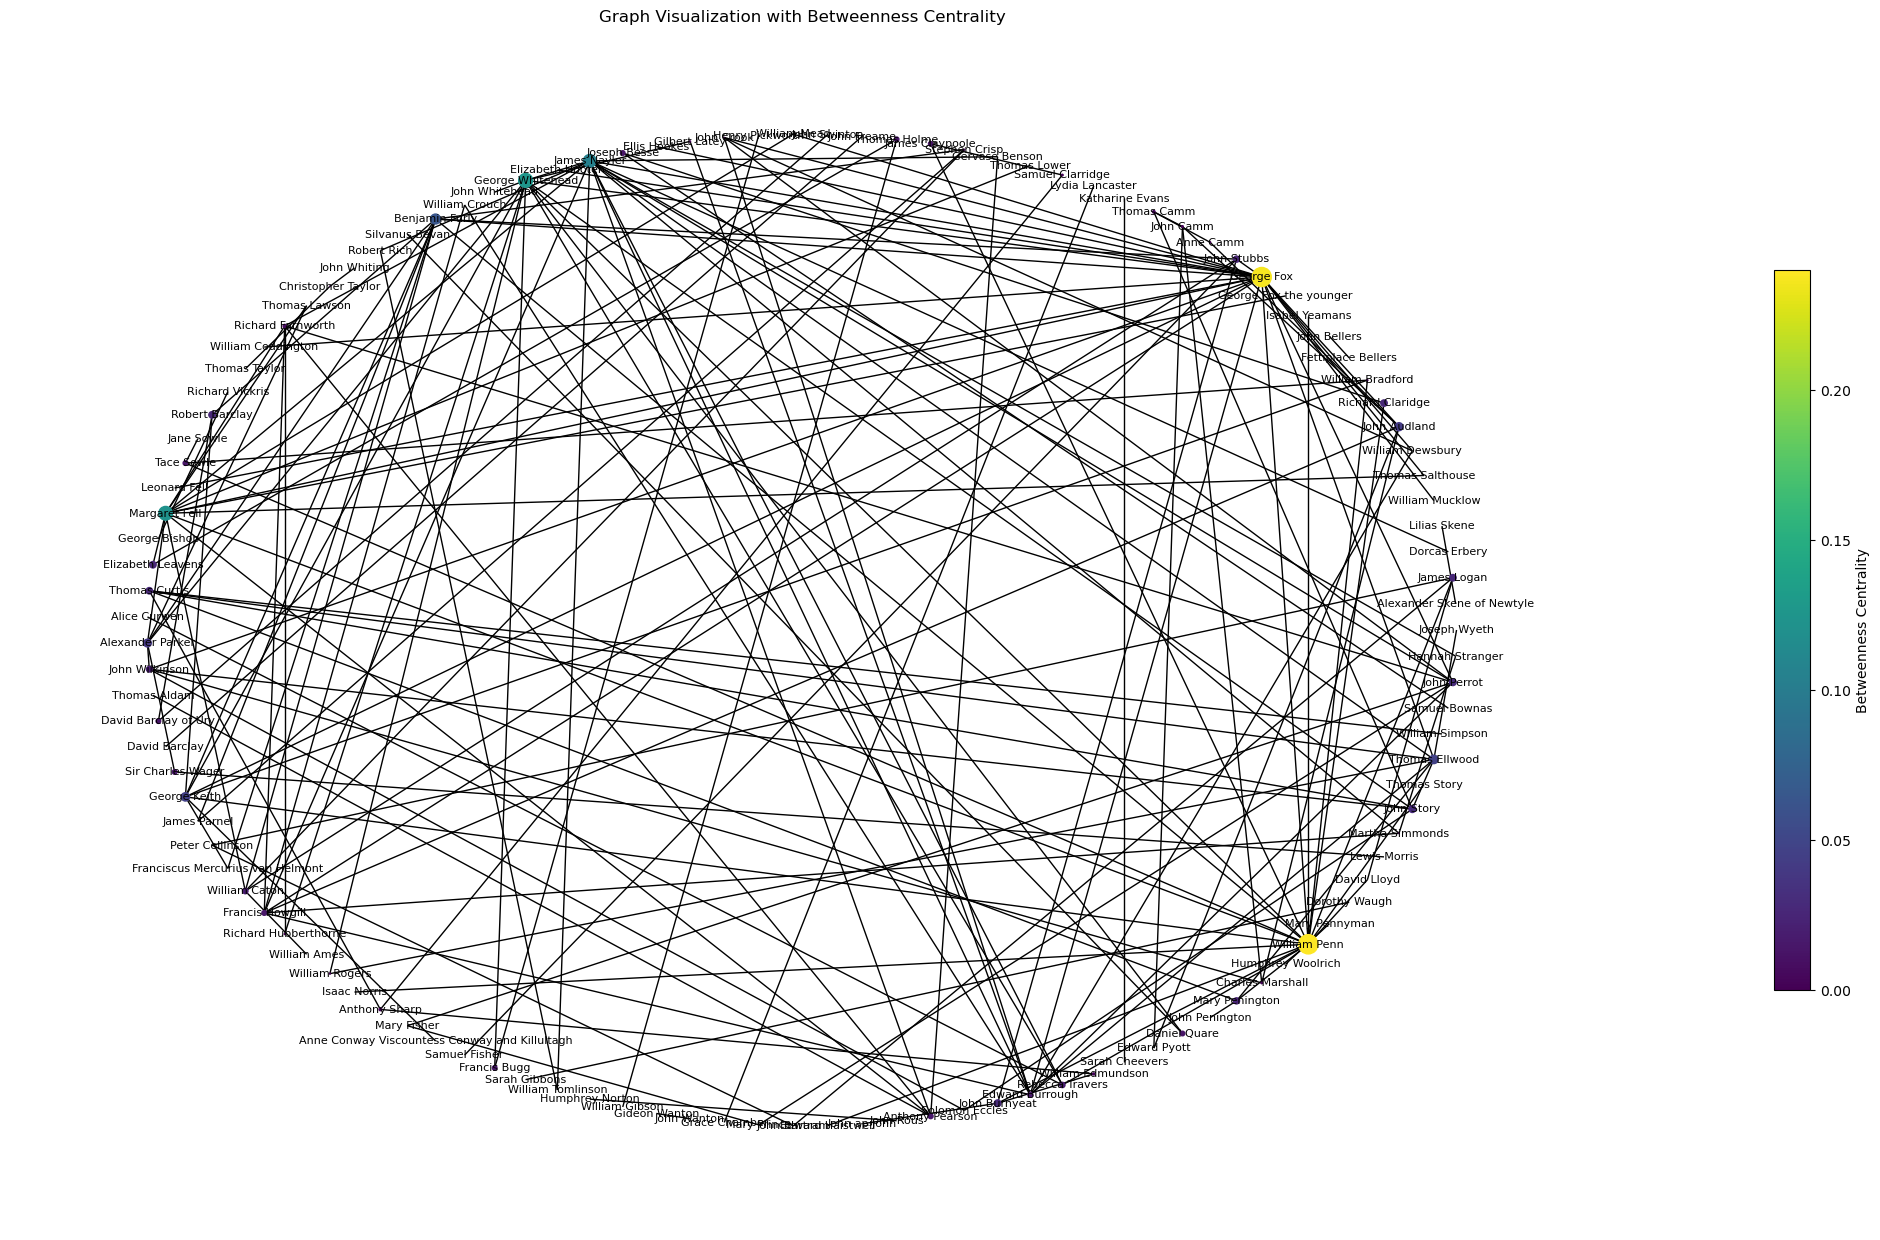

In [23]:
# Run betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

# Calculate node size based on betweenness centrality
node_size = [800 * betweenness_dict[node] for node in G.nodes()]

# Draw the graph with nodes colored based on betweenness centrality
pos = nx.circular_layout(G)  # Circular layout for better visualization
node_color = [betweenness_dict[node] for node in G.nodes()]

# Normalize betweenness centrality values to be between 0 and 1
normalized_node_color = (np.array(node_color) - min(node_color)) / (max(node_color) - min(node_color))

# Improved color mapping with seaborn
sns.set_palette("viridis")

# Increase the figure size
plt.figure(figsize=(18, 12))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=plt.cm.viridis(normalized_node_color), node_size=node_size, font_size=8)

# Add color bar on the side
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1, ax=plt.gca())
cbar.set_label('Betweenness Centrality')

# Add a title to the graph
plt.title("Graph Visualization with Betweenness Centrality")

plt.show()

The graph visualization with betweenness centrality shows a network where each node is colored and sized based on its importance. Here's a breakdown:

Node Color: Darker colors mean more importance, indicating nodes that are crucial for connecting others.

Node Size: Larger nodes are more important, showing their critical role in maintaining network connections.

Layout: Nodes are arranged in a circle for a clearer view of the network structure.

Top Nodes Printed: The code lists the top 20 most important nodes based on betweenness centrality.

Color Map: Colors follow a gradient (from light to dark) using the 'viridis' color map.

By looking at the graph, you can easily spot nodes crucial for connecting different parts of the network. Darker and larger nodes play significant roles in maintaining smooth communication between nodes. This visualization helps you understand which nodes are key players in network connectivity.

#### Betweenness Centrality Bar Graph

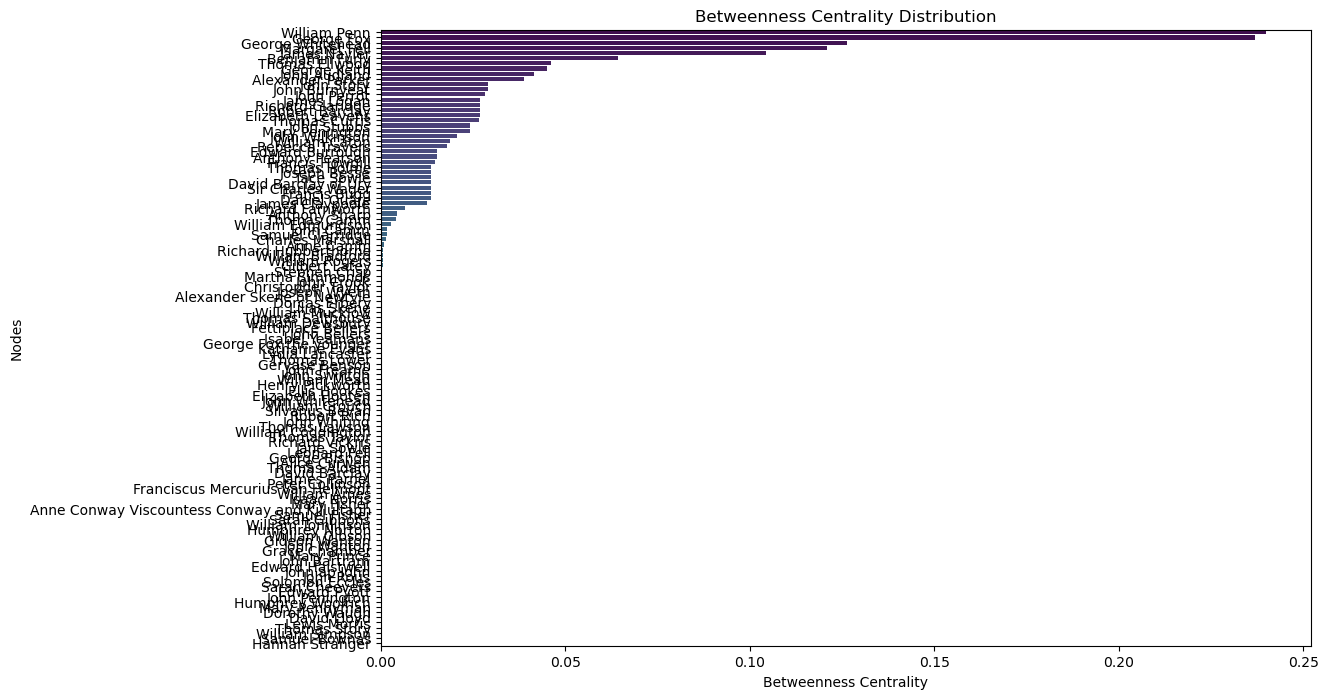

In [24]:
# Run betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

# Extract node names and their corresponding betweenness centrality values
nodes, betweenness_values = zip(*sorted_betweenness)

# Convert nodes to strings
nodes = [str(node) for node in nodes]

# Convert betweenness values to numeric
betweenness_values = [float(value) for value in betweenness_values]

# Create a horizontal bar chart with increased spacing
plt.figure(figsize=(12, 8))
sns.barplot(x=betweenness_values, y=nodes, palette="viridis", dodge=True)

# Add labels and title
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.title('Betweenness Centrality Distribution')

plt.show()


#### Eigenvector Centrality Graph

Top 20 nodes by eigenvector centrality:
('George Fox', 0.4491750710859924)
('James Nayler', 0.3352974100447867)
('William Penn', 0.27032201153998675)
('Margaret Fell', 0.253170949905681)
('George Whitehead', 0.2497455334914196)
('Edward Burrough', 0.23147427604862303)
('Francis Howgill', 0.19095393782681047)
('Benjamin Furly', 0.1878520634691651)
('John Perrot', 0.18496928077956107)
('George Keith', 0.1838469086791535)
('Thomas Ellwood', 0.17608142535843857)
('Richard Farnworth', 0.15368535029296415)
('John Crook', 0.1327158126880779)
('Rebecca Travers', 0.1184804064465093)
('Alexander Parker', 0.11587808682088323)
('Anthony Pearson', 0.11120476725256785)
('William Dewsbury', 0.11057869321157118)
('John Stubbs', 0.10693500692141822)
('John Audland', 0.09830889719333748)
('Thomas Salthouse', 0.0954862854413877)


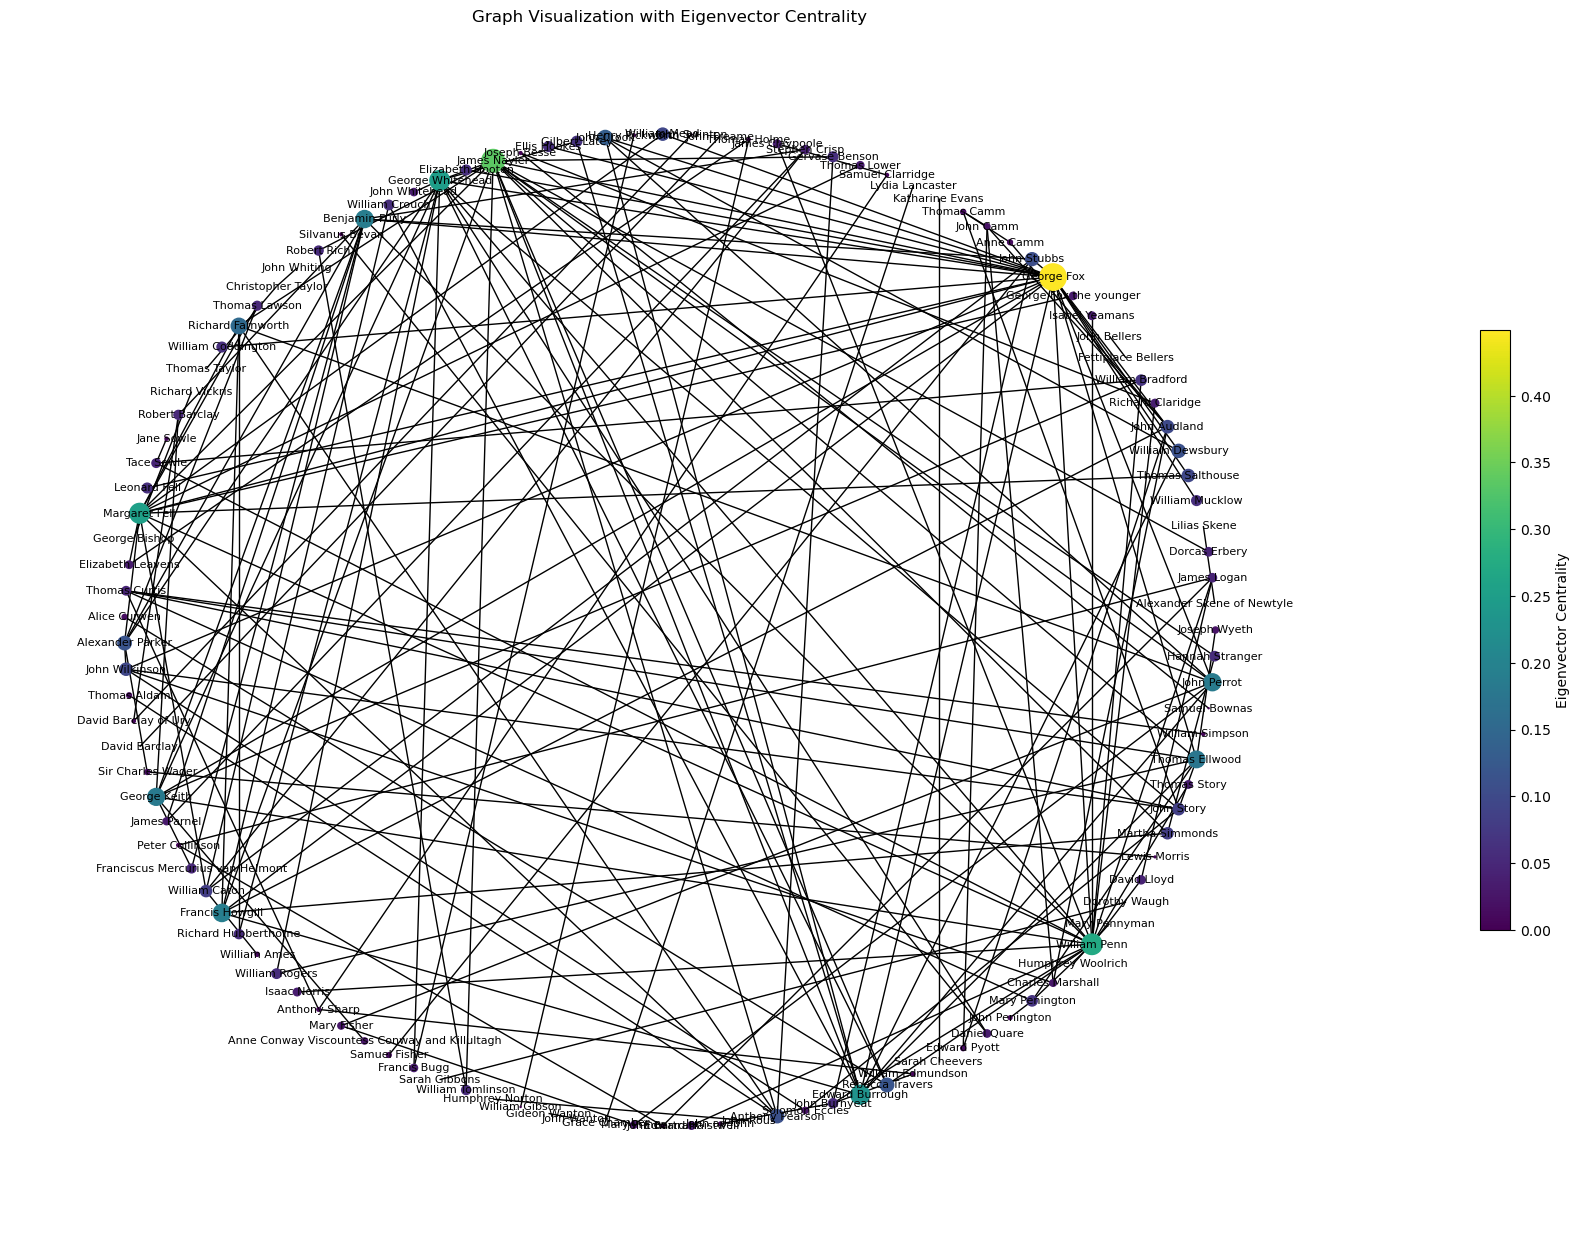

In [25]:
# Run eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)

# Assign each to an attribute in your network
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for e in sorted_eigenvector[:20]:
    print(e)

# Draw the graph with nodes colored based on eigenvector centrality
pos = nx.circular_layout(G)  # Circular layout for better visualization
node_color = [eigenvector_dict[node] for node in G.nodes()]
node_size = [800 * eigenvector_dict[node] for node in G.nodes()]

# Improved color mapping with seaborn
sns.set_palette("viridis")
plt.figure(figsize=(15, 12))
nx.draw(G, pos, with_labels=True, node_color=node_color, cmap=plt.cm.viridis, node_size=node_size, font_size=8)

# Add color bar on the side
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.1, ax=plt.gca())
cbar.set_label('Eigenvector Centrality')

plt.title("Graph Visualization with Eigenvector Centrality")
plt.show()

The graph visualization with eigenvector centrality shows a network where each node is colored and sized based on its eigenvector centrality, a measure of its influence in the network. Here's a breakdown:

Node Color: Darker colors indicate higher eigenvector centrality, highlighting nodes that hold more influence over the network.

Node Size: Larger nodes represent higher eigenvector centrality, emphasizing nodes with greater impact in the network structure.

Layout: Nodes are arranged in a circular layout for a clearer view of their connections and influence.

Top Nodes Printed: The code lists the top 20 nodes with the highest eigenvector centrality, showcasing the most influential nodes in the network.

Color Map: The color gradient follows the 'viridis' color map, helping to visually distinguish the centrality levels of different nodes.

By examining this graph, you can identify nodes that play crucial roles in influencing and connecting other nodes within the network. Darker and larger nodes signify key players that wield significant influence over the overall network structure. This visualization aids in understanding the importance of nodes in terms of their eigenvector centrality.

#### Eigenvector Centrality Bar Graph

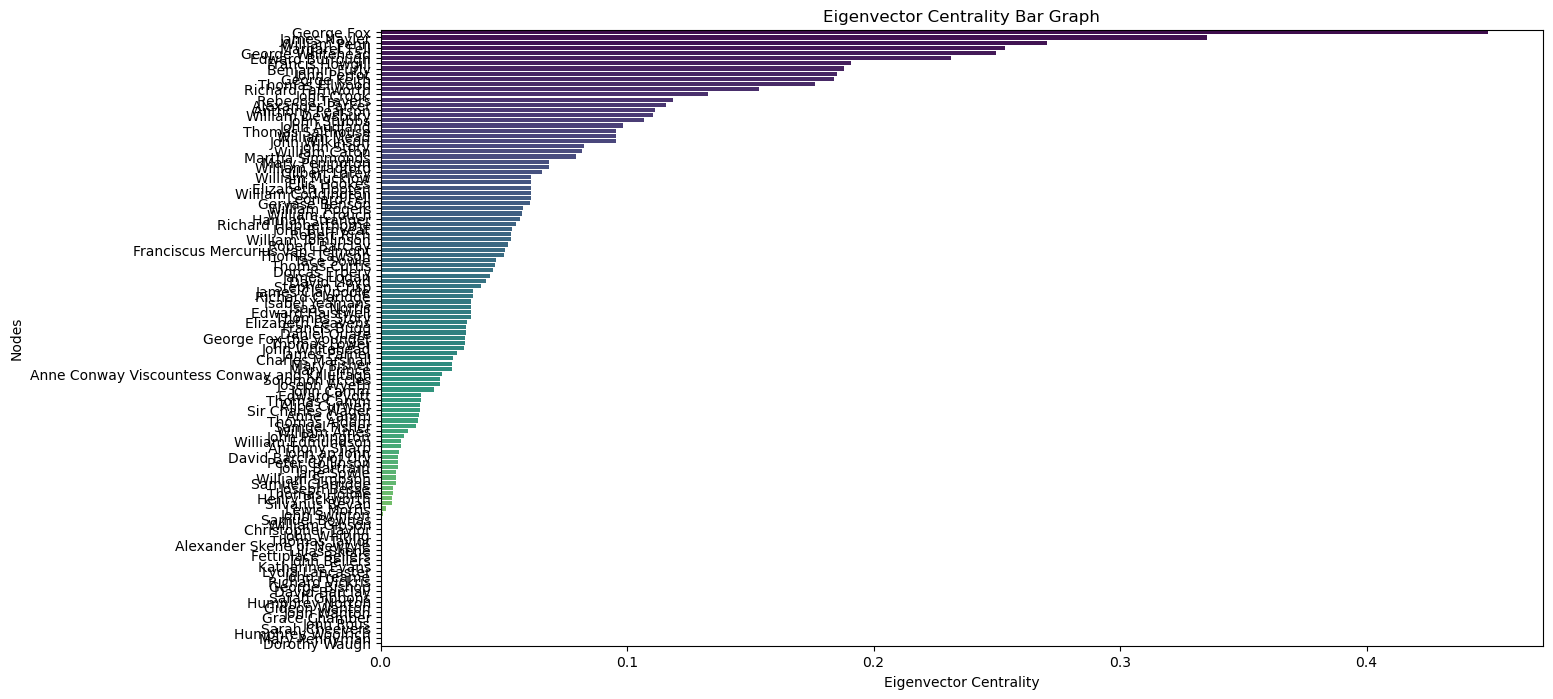

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from operator import itemgetter

# Assuming you already have G as your graph

# Run eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)

# Assign each to an attribute in your network
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

# Extract node names and eigenvector centrality values
nodes, eigenvector_values = zip(*sorted_eigenvector)

# Convert eigenvector_values to a valid data type for plotting
eigenvector_values = list(eigenvector_values)

# Create a horizontal bar chart with increased spacing
plt.figure(figsize=(15, 8))
sns.barplot(x=eigenvector_values, y=list(nodes), palette="viridis")

# Add labels and title
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nodes')
plt.title('Eigenvector Centrality Bar Graph')

plt.show()

## Conclusion

After analyzing various network metrics using Python, you now have valuable information to support arguments and draw conclusions about the Quaker network in early modern Britain. The network exhibits relatively low density, indicating loose connections or incomplete data. It revolves around a few significantly large hubs, including founders like Margaret Fell and George Fox, as well as influential figures like William Penn. Notably, women with low degrees, such as Elizabeth Leavens and Mary Penington, may have served as brokers, connecting different groups due to their high betweenness centrality. The network consists of one large component and several small ones, with distinct communities, some organized around time or place (like Penn and his American associates). Further exploration and potential explanations is needed to identify further structural features.

PLEASE NOTE: That the color bars for the Betweenness Centrality Graph and Eigenvector Centrality Bar Graph are not corresponding to the degrees. For some reason it supposed to be the darkest color with the highes degree and vise versa. I tried everything and I couldn't figure it out. 